In [1]:
import math
from time import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

import dvfdata

dep_selection="All"
#dep_selection="77"
df=dvfdata.loadDVF_Maisons(departement=dep_selection,refresh_force=False
                           ,add_commune=False,filterColsInsee="NoNe")
df_prepared=dvfdata.prepare_df(df,remove_categories=False)
# Keep only random part of all records.
#df_prepared=df_prepared.sample(n=700000, random_state=42)

Read Mutations
Read Local
Read Parcelle
Read Adresse
Make the join for DVF
Filter data:
Final Calculations
Prepare : filter extrem values
Add Big cities per Departements Distance
Read Biggest Communes per Departement
Prepare : drop geo categories
Prepare : update categories


In [2]:
data_df=df.copy()

Nb de Mutations : 1859556


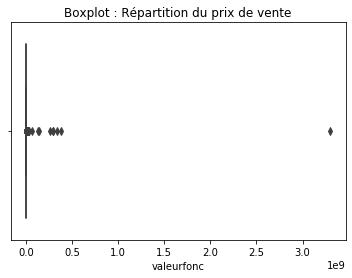

In [3]:
import seaborn as sns
#sns.set(style="whitegrid")
ax = sns.boxplot(x=data_df['valeurfonc'])
ax.set_title("Boxplot : Répartition du prix de vente")
print("Nb de Mutations :",data_df.shape[0])

Nb de Mutations : 1859555
Nb de Mutations écartées : 1


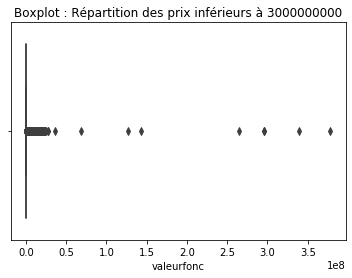

In [4]:
#thresholds=[3000000000,100000000,10000000]
threshold=3000000000 # 3 milliards
selected=data_df[data_df['valeurfonc']<threshold]
removed=data_df[data_df['valeurfonc']>=threshold]
ax = sns.boxplot(x=selected['valeurfonc']) 
ax.set_title("Boxplot : Répartition des prix inférieurs à "+str(threshold))
print("Nb de Mutations :",selected.shape[0])
print("Nb de Mutations écartées :",removed.shape[0])

Nb de Mutations : 1859548
Nb de Mutations écartées : 8


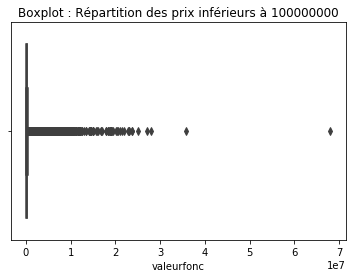

In [5]:
threshold=100000000 # 100 millions
selected=data_df[data_df['valeurfonc']<threshold]
removed=data_df[data_df['valeurfonc']>=threshold]
ax = sns.boxplot(x=selected['valeurfonc']) 
ax.set_title("Boxplot : Répartition des prix inférieurs à "+str(threshold))
print("Nb de Mutations :",selected.shape[0])
print("Nb de Mutations écartées :",removed.shape[0])

Nb de Mutations : 1859464
Nb de Mutations écartées : 92 pourcentage: 0.004947662337103595


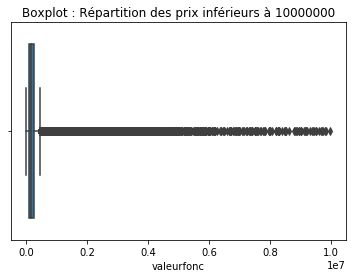

In [6]:
threshold=10000000 # 10 millions
selected=data_df[data_df['valeurfonc']<threshold]
removed=data_df[data_df['valeurfonc']>=threshold]
ax = sns.boxplot(x=selected['valeurfonc']) 
ax.set_title("Boxplot : Répartition des prix inférieurs à "+str(threshold))
print("Nb de Mutations :",selected.shape[0])
print("Nb de Mutations écartées :",removed.shape[0],"pourcentage:",removed.shape[0]/selected.shape[0]*100)

Nb de Mutations : 1857324
Nb de Mutations écartées : 2232 pourcentage: 0.12017289390542524


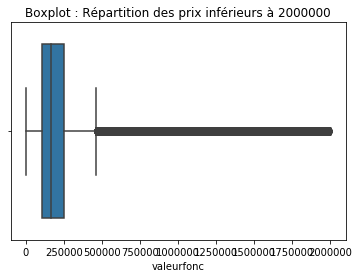

In [7]:
threshold=2000000 # 2 millions
selected=data_df[data_df['valeurfonc']<threshold]
removed=data_df[data_df['valeurfonc']>=threshold]
ax = sns.boxplot(x=selected['valeurfonc']) 
ax.set_title("Boxplot : Répartition des prix inférieurs à "+str(threshold))
print("Nb de Mutations :",selected.shape[0])
print("Nb de Mutations écartées :",removed.shape[0],"pourcentage:",removed.shape[0]/selected.shape[0]*100)

Nb de Mutations : 1847356
Nb de Mutations écartées : 12200 pourcentage: 0.6604033007173495


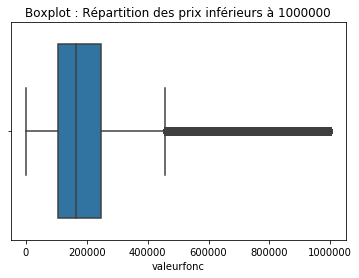

In [8]:
threshold=1000000 # 1 millions
selected=data_df[data_df['valeurfonc']<threshold]
removed=data_df[data_df['valeurfonc']>=threshold]
ax = sns.boxplot(x=selected['valeurfonc']) 
ax.set_title("Boxplot : Répartition des prix inférieurs à "+str(threshold))
print("Nb de Mutations :",selected.shape[0])
print("Nb de Mutations écartées :",removed.shape[0],"pourcentage:",removed.shape[0]/selected.shape[0]*100)

In [9]:
cat_cols= data_df.select_dtypes([np.object]).columns
num_cols = data_df.select_dtypes([np.number]).columns
print("Categories :",cat_cols)
print("Numeriques :",num_cols)

Categories : Index(['quartier', 'commune', 'departement', 'communelabel', 'codepostal'], dtype='object')
Numeriques : Index(['valeurfonc', 'sterr', 'geolong', 'geolat', 'nbpprinc', 'sbati',
       'n_days', 'quarter'],
      dtype='object')


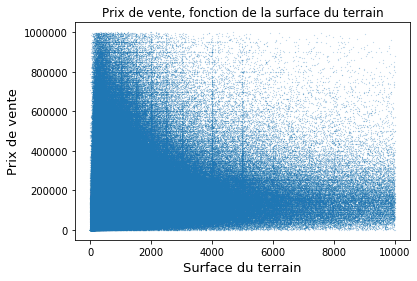

In [10]:
threshold=1000000 # 1 millions
selected=df_prepared[df_prepared['valeurfonc']<threshold]

fig, ax = plt.subplots()
ax.scatter(x = selected['sterr'], y = selected['valeurfonc'],s=0.01)
plt.ylabel('Prix de vente', fontsize=13)
plt.xlabel('Surface du terrain', fontsize=13)
plt.title("Prix de vente, fonction de la surface du terrain")
plt.show()

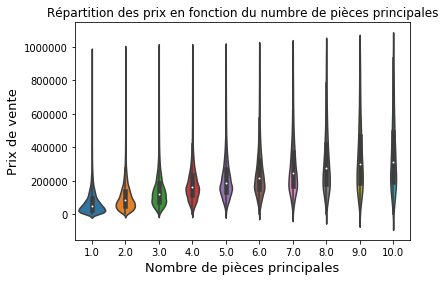

In [11]:
threshold=1000000 # 1 millions
selected=df_prepared[df_prepared['valeurfonc']<threshold]
# df
# df_prepared
ax = sns.violinplot(x="nbpprinc", y="valeurfonc", data=selected)
plt.ylabel('Prix de vente', fontsize=13)
plt.xlabel('Nombre de pièces principales', fontsize=13)
plt.title("Répartition des prix en fonction du numbre de pièces principales")
plt.show()

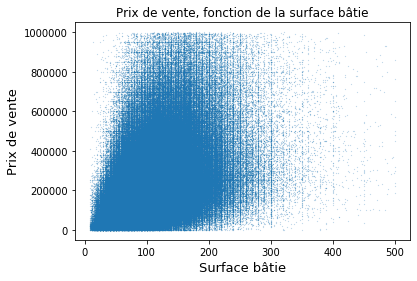

In [12]:
threshold=1000000 # 1 millions
selected=df_prepared[df_prepared['valeurfonc']<threshold]
# df
# df_prepared
fig, ax = plt.subplots()
ax.scatter(x = selected['sbati'], y = selected['valeurfonc'],s=0.01)
plt.ylabel('Prix de vente', fontsize=13)
plt.xlabel('Surface bâtie', fontsize=13)
plt.title("Prix de vente, fonction de la surface bâtie")
plt.show()

In [13]:
# Notebook Kaggle avec de bonnes idées :
# Utilisation  de l'analyse ici : https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard
# pour voir comment est distribuée la valeur de target

# https://www.kaggle.com/johnwill225/extensive-exploratory-data-analysis


 mu = 193930.73 and sigma = 134216.58



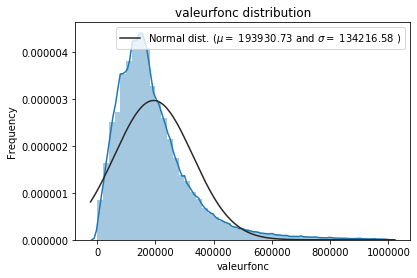

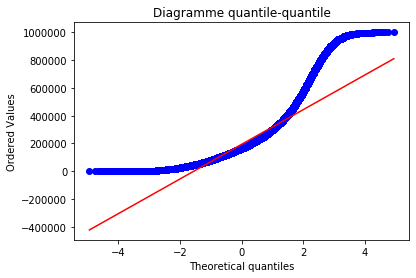

In [54]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

threshold=1000000 # 1 millions
selected=df_prepared[df_prepared['valeurfonc']<threshold]

sns.distplot(selected['valeurfonc'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(selected['valeurfonc'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('valeurfonc distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(selected['valeurfonc'], plot=plt)
plt.title('Diagramme quantile-quantile')
plt.show()

# QQ-plot : https://fr.wikipedia.org/wiki/Diagramme_quantile-quantile

In [53]:
# Valeur du biai (décallage)
print(selected['valeurfonc'].skew())

1.8337648807992888



 mu = 11.94 and sigma = 0.76



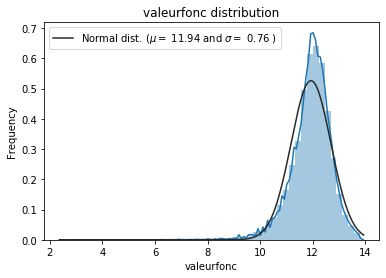

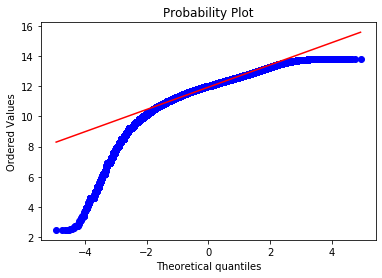

In [15]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
selected['valeurfonc']= np.log1p(selected['valeurfonc'])
# Then, to get back the real target : pred = np.expm1(models.predict(x_pred))

#Check the new distribution 
sns.distplot(selected['valeurfonc'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(selected['valeurfonc'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('valeurfonc distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(selected['valeurfonc'], plot=plt)
plt.show()

In [18]:
df_prepared
df_prepared_na = (df_prepared.isnull().sum() / len(df_prepared)) * 100
#df_prepared_na = df_prepared_na.drop(df_prepared_na[df_prepared_na == 0].index).sort_values(ascending=False)[:30]
#missing_data = pd.DataFrame({'Missing Ratio' :df_prepared_na})
#missing_data.head(20)
print(df_prepared_na)

valeurfonc             0.000
sterr                  0.000
geolong                0.000
geolat                 0.000
nbpprinc               0.000
sbati                  0.000
n_days                 0.000
quarter                0.000
department_city_dist   0.000
dtype: float64


Read Communes INSEE
Read Communes INSEE
                                                Missing Ratio
Capacité Camping                                        0.305
Nb Camping                                              0.305
Capacité Hotel                                          0.305
Nb Hotel                                                0.305
Nb Logement Secondaire et Occasionnel                   0.305
Nb Atifs                                                0.041
Nb Actifs Non Salariés                                  0.041
Nb Actifs Salariés                                      0.041
Nb Création Industrielles                               0.003
Dynamique Entrepreneuriale                              0.003
Dynamique Entrepreneuriale Service et Commerce          0.003
Nb Entreprises Secteur Services                         0.003
Nb Entreprises Secteur Commerce                         0.003
Nb Entreprises Secteur Construction                     0.003
Nb Entreprises Secteur Industr

Text(0.5, 1.0, 'Pourcentage de valeurs manquantes par caractéristique')

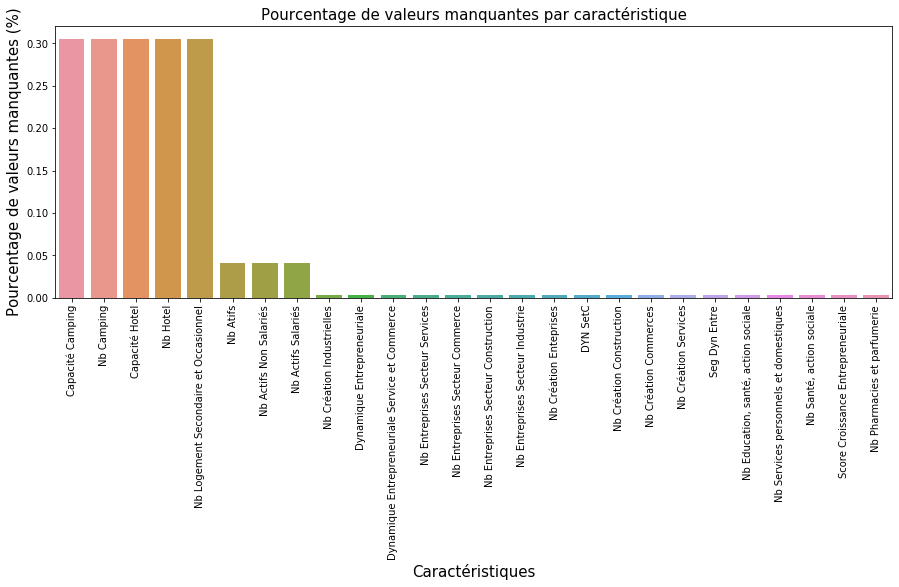

In [56]:
communes_insee_df=dvfdata.load_communes_insee()

communes_insee_na = (communes_insee_df.isnull().sum() / len(communes_insee_df)) * 100
communes_insee_na = communes_insee_na.drop(communes_insee_na[communes_insee_na == 0].index).sort_values(ascending=False)[:40]
missing_data = pd.DataFrame({'Missing Ratio' :communes_insee_na})
print(missing_data.head(40))
f, ax = plt.subplots(figsize=(15, 5))
plt.xticks(rotation='90')
sns.barplot(x=communes_insee_na.index, y=communes_insee_na)
plt.xlabel('Caractéristiques', fontsize=15)
plt.ylabel('Pourcentage de valeurs manquantes (%)', fontsize=15)
plt.title('Pourcentage de valeurs manquantes par caractéristique', fontsize=15)

In [36]:
df_prepared.shape

(1790754, 9)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]), <a list of 6 Text yticklabel objects>)

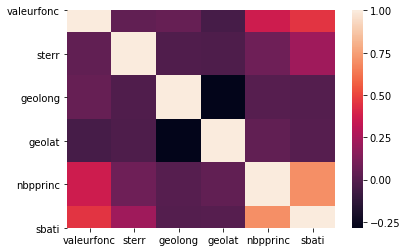

In [55]:
#Correlation map to see how features are correlated with SalePrice
df_dvf=df_prepared.drop(columns=['department_city_dist','quarter','n_days'])
corr_matrice = df_dvf.corr()
plt.subplots(figsize=(6,4))
sns.heatmap(corr_matrice,xticklabels=True, yticklabels=True)#, vmax=0.9, square=True)
plt.yticks(rotation=0)
#plt.yticks(np.arange(6)+0.5,('valeurfonc', 'sterr', 'geolong', 'geolat', 'nbpprinc', 'sbati'), rotation=0, fontsize="10", va="center")

In [44]:
df_dvf.columns

Index(['valeurfonc', 'sterr', 'geolong', 'geolat', 'nbpprinc', 'sbati'], dtype='object')